# Whatlies - Word embedding representations

In [1]:
%%capture --no-stderr
!pip install -Uqq whatlies[all]
!pip install -Uqq spacy
!python3 -m spacy download en_core_web_md

In [ ]:
#@title ###Restart your runtime to reload the installed packages
import os
os.kill(os.getpid(), 9)

In [30]:
import matplotlib.pylab as plt
import spacy
import whatlies
from whatlies import Embedding
from whatlies.language import SpacyLanguage
from whatlies.transformers import Pca, Umap

print("matplotlib.pylab", plt.__version__, sep="\t")
print("spacy", spacy.__version__, sep="\t\t\t")
print("whatlies", whatlies.__version__, sep="\t\t")

matplotlib.pylab	1.19.4
spacy			2.3.5
whatlies		0.5.10


In [3]:
man = Embedding("man", [0.5, 0.1])
woman = Embedding("woman", [0.5, 0.6])
king = Embedding("king", [0.7, 0.33])
queen = Embedding("queen", [0.7, 0.9])

In [17]:
man + woman

Emb[(man + woman)]

In [4]:
man | woman

Emb[(man | woman)]

In [5]:
(man | (queen - king)).vector

array([0.5, 0. ])

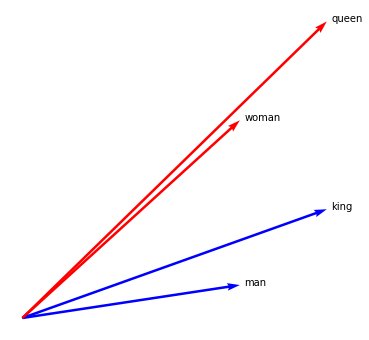

In [6]:
plt.figure(figsize=(6, 6))

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

plt.axis("off");

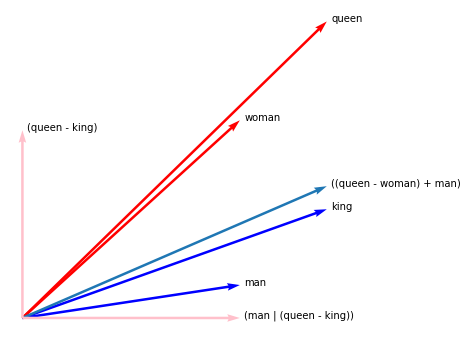

In [7]:
plt.figure(figsize=(6, 6))

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

((queen - woman) + man).plot(kind="arrow", show_ops=True)
(queen - king).plot(kind="arrow", color="pink", show_ops=True)
(man | (queen - king)).plot(kind="arrow", color="pink", show_ops=True)

plt.axis("off");

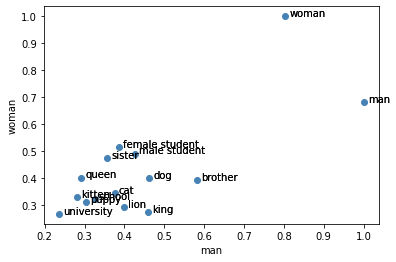

In [19]:
nlp = spacy.load("en_core_web_md")

words = [
    "man",
    "woman",
    "king",
    "queen",
    "brother",
    "sister",
    "cat",
    "dog",
    "lion",
    "puppy",
    "male student",
    "female student",
    "university",
    "school",
    "kitten",
]
tokens = {t.text: Embedding(t.text, t.vector) for t in nlp.pipe(words)}

x_axis = tokens["man"]
y_axis = tokens["woman"]

for name, t in tokens.items():
    t.plot(x_axis=x_axis, y_axis=y_axis, kind="scatter").plot(
        kind="text", x_axis=x_axis, y_axis=y_axis
    )

### Measuring the Mapping

In [20]:
woman > king, woman > man

(0.9150108532309235, 1.1923076923076923)

### Using Language Backends

In [21]:
lang = SpacyLanguage("en_core_web_md")
words = ["prince", "princess", "nurse", "doctor", "banker", "man", "woman", 
         "cousin", "neice", "king", "queen", "dude", "guy", "gal", "fire", 
         "dog", "cat", "mouse", "red", "bluee", "green", "yellow", "water", 
         "person", "family", "brother", "sister"]
emb = lang[words]

In [22]:
type(lang), type(emb)

(whatlies.language._spacy_lang.SpacyLanguage,
 whatlies.embeddingset.EmbeddingSet)

In [26]:
orig_chart = emb.plot_interactive("man", "woman")
orig_chart

alt.LayerChart(...)

In [28]:
new_ts = emb | (emb["king"] - emb["queen"])
new_chart = new_ts.plot_interactive("man", "woman")
orig_chart | new_chart

alt.HConcatChart(...)

In [31]:
emb.transform(lambda e: e | (e["man"] - e["woman"])).transform(Pca(2))

(EmbSet | (man - woman)).pca_2()

## Transformations

In [49]:
pca_emb = emb.transform(Pca(2))
umap_emb = emb.transform(Umap(2))

pca_emb.plot_interactive(
    x_label="pca 0", y_label="pca 1", title="PCA transformations"
) | umap_emb.plot_interactive(
    x_label="umap 0", y_label="umap 1", title="UMAP transformations"
)

alt.HConcatChart(...)